<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 2. Визуальный анализ данных
## <center>Практическое задание. Визуальный анализ данных по пассажирам "Титаника". Решение

**<a href="https://www.kaggle.com/c/titanic">Соревнование</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Считываем обучающую выборку.**

In [72]:
train_df = pd.read_csv("../../data/titanic_train.csv", 
                       index_col='PassengerId') 

In [73]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [74]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Greenberg, Mr. Samuel",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 66.1+ KB


**Выкинем признак `Cabin`, а потом – все строки, где есть пропуски.**

In [75]:
train_df = train_df.drop('Cabin', axis=1).dropna()

**Постройте попарные зависимости признаков `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

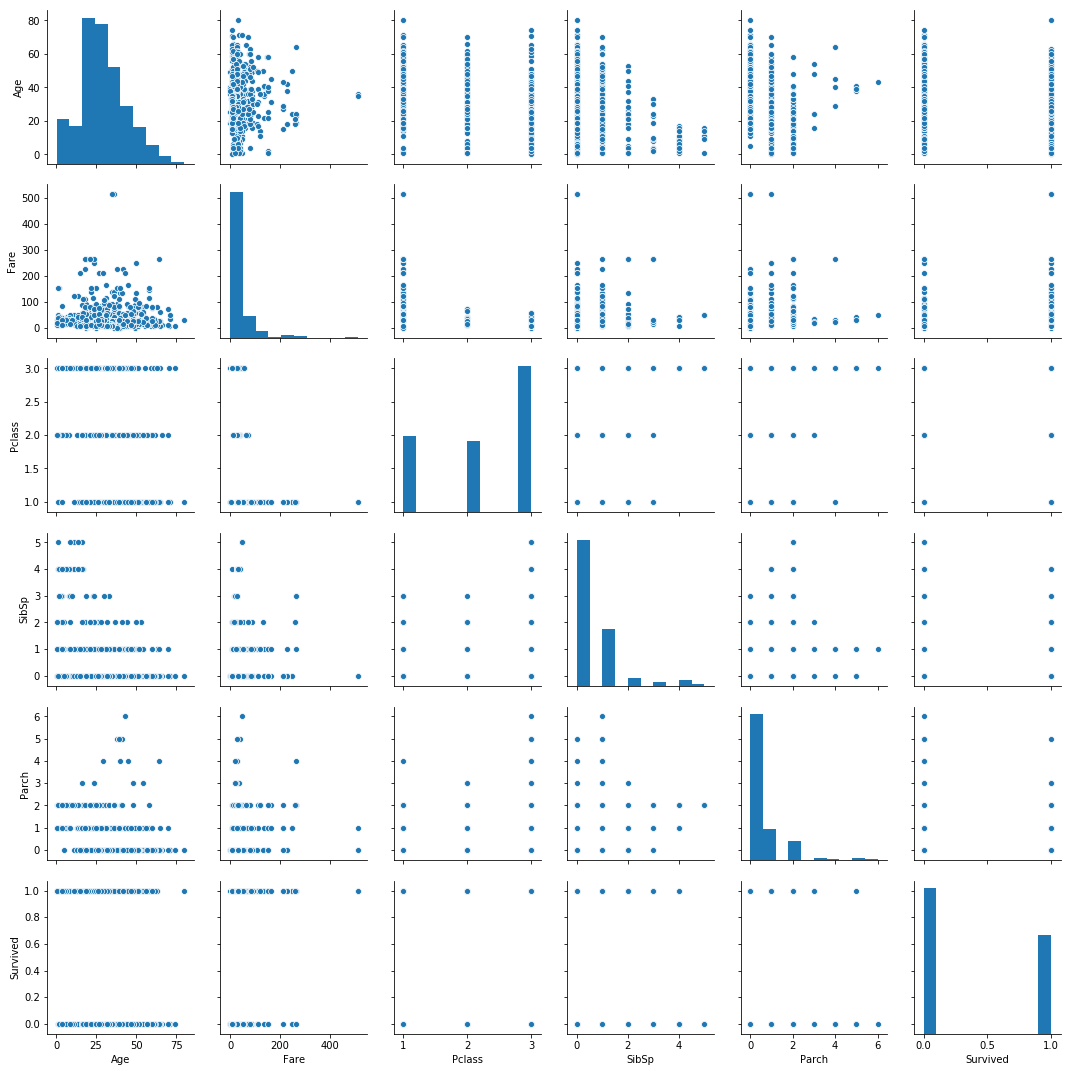

In [5]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(train_df[['Age', 'Fare', 'Pclass', 'Sex', 
                       'SibSp', 'Parch', 'Embarked', 'Survived']])
pass

**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

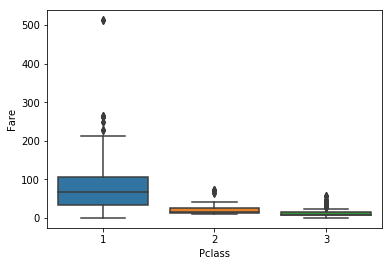

In [110]:
%config InlineBackend.figure_format = 'png' 
sns.boxplot(y='Fare', x='Pclass', data=train_df[['Fare','Pclass']]);

**Такой boxplot получается не очень красивым из-за выбросов.** 

**Опционально: создайте признак `Fare_no_out` (стоимости без выбросов), в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости.**

In [96]:
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']

train_df_pclassFare_std =  train_df[train_df['Pclass'] == 1]['Fare'].std()

fare_pclass1_no_out = train_df[train_df['Pclass'] == 1][train_df['Fare'] < 2*train_df[train_df['Pclass'] == 1]
                                                        ['Fare'].std()]['Fare']

fare_pclass2_no_out = train_df.loc[train_df['Pclass'] == 2][train_df['Fare'] < 2*train_df[train_df['Pclass'] == 2]
                                                        ['Fare'].std()]['Fare']
fare_pclass3_no_out = train_df[train_df['Pclass'] == 3][train_df['Fare'] < 2*train_df[train_df['Pclass'] == 3]
                                                        ['Fare'].std()]['Fare']
train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out)\
                                             .append(fare_pclass3_no_out)
pass

/home/hattory/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/home/hattory/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/hattory/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [127]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_no_out
count,712.000000,712.000000,712,712,712.000000,712.000000,712.000000,712,712.000000,712,598.000000
unique,NaN,NaN,712,2,NaN,NaN,NaN,541,NaN,3,NaN
top,NaN,NaN,"Madill, Miss. Georgette Alexandra",male,NaN,NaN,NaN,347082,NaN,S,NaN
freq,NaN,NaN,1,453,NaN,NaN,NaN,7,NaN,554,NaN
mean,0.404494,2.240169,NaN,NaN,29.642093,0.514045,0.432584,NaN,34.567251,NaN,26.478539
std,0.491139,0.836854,NaN,NaN,14.492933,0.930692,0.854181,NaN,52.938648,NaN,31.108728
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,0.000000
25%,0.000000,1.000000,NaN,NaN,20.000000,0.000000,0.000000,NaN,8.050000,NaN,7.925000
50%,0.000000,2.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,15.645850,NaN,13.000000
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,1.000000,NaN,33.000000,NaN,26.550000


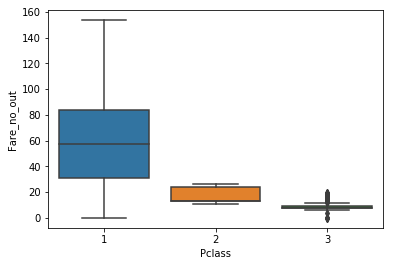

In [128]:
%config InlineBackend.figure_format = 'png' 
sns.boxplot( x = 'Pclass', y= 'Fare_no_out', data = train_df[['Fare_no_out', 'Pclass']]);

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.**

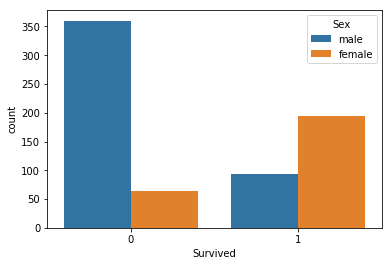

In [97]:
sns.countplot(x = 'Survived', hue='Sex', data = train_df)
pass

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.**

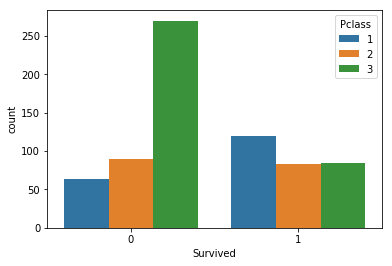

In [98]:
sns.countplot(x = 'Survived', hue = 'Pclass', data= train_df);

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.**

In [99]:
young_old_survived = pd.DataFrame( { 'Age' :  train_df[ ((train_df['Age'] < 30) | (train_df['Age'] > 60)) &
                                                     (train_df['Survived'] == 1) ]['Age'],
                            'Survived' : train_df[ ((train_df['Age'] < 30) | (train_df['Age'] > 60)) &
                                                     (train_df['Survived'] ==1) ]['Survived'],
                                   'All' : train_df[ (train_df['Age'] < 30) | (train_df['Age'] > 60) ]['Survived']})

In [100]:
young_old_survived.loc[(young_old_survived['Age'] < 30), 'Age'] = 0
young_old_survived.loc[(young_old_survived['Age'] > 60), 'Age'] = 1

In [104]:
young_alive = round( 100*young_old_survived[(young_old_survived['Age'] == 0) &
                                            (young_old_survived['Survived'] == 1)]['Survived'].count() / \
                                             young_old_survived['All'].count(), 2 )

In [105]:
old_alive = round( 100*young_old_survived[(young_old_survived['Age'] == 1) & 
                                          (young_old_survived['Survived'] == 1)]['Survived'].count() / \
                                           young_old_survived['All'].count(), 2 )

In [106]:
young_alive, old_alive, young_old_survived['All'].count()

(38.52, 0.99, 405)

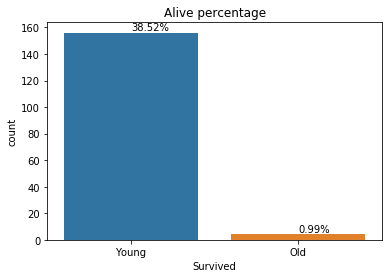

In [107]:
plt.figure(figsize=(6,4))
cp = sns.countplot(x = 'Age', data = young_old_survived)
cp.annotate(str(young_alive) + '%', (0 ,young_old_survived[(young_old_survived['Age'] == 0)]['Survived'].count()+2));
cp.annotate(str(old_alive) + '%', (1 ,young_old_survived[(young_old_survived['Age'] == 1)]['Survived'].count()+2));
plt.xticks(range(2), ['Young', 'Old'])
plt.xlabel('Survived')
plt.title('Alive percentage');